# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 4__

__Nombres de los estudiantes: Carlos Tardón Rubio y Carlos Morán Alfonso__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [125]:
random_state = 50
import pandas as pd
import numpy as np
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.cluster as skc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [126]:
df_clev = pd.read_csv('cleveland.csv').dropna()
df_clev ## Datagrama original

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6.0       0  
1      2.0  3.0   3.0       2  
2      2.0  2.0   7.0       1  
3      3.0  0.0   3.0       0  
4      1.0  0.0   3.0       0  
..     ...  ...   ...     ...  
297    2.0  0.0   7.0       1  
298    2.0  0.0   7.0       1  
299    2.0  2.0   7.0       2  
300    2.0  1.0   7.0       3  
301    2.0  1.0   3.0       1  

[297 rows x 14 columns]

In [127]:
## Indicamos las variables categóricas (básicamente son todas aquellas divididas en "categorías" en al explicación de más arriba)
df_clev['target'] = df_clev['target'].apply(lambda x: 'Enfermo' if x > 0 else 'Normal')
df_clev['sex'] = df_clev['sex'].astype('category')
df_clev['cp'] = df_clev['cp'].astype('category')
df_clev['fbs'] = df_clev['fbs'].astype('category')
df_clev['restecg'] = df_clev['restecg'].astype('category')
df_clev['exang'] = df_clev['exang'].astype('category')
df_clev['slope'] = df_clev['slope'].astype('category')
df_clev['ca'] = df_clev['ca'].astype('category')
df_clev['thal'] = df_clev['thal'].astype('category')
df_clev['target'] = df_clev['target'].astype('category')
df_clev

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   
..    ...  ...  ...       ...    ...  ...     ...      ...   ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0     0.0    123.0   1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0     0.0    132.0   0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0     0.0    141.0   0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0     0.0    115.0   1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0     2.0    174.0   0.0      0.0   

    slope   ca thal   target  
0     3.0  0.0  6.0   Normal  
1     2.0  3.0  3.0  Enfermo  
2     2.0  2.0  7.0  Enfermo  
3     3.0  0.0  3.0   Normal  
4     1.0  0.0  3.0   Normal  
..    ...  ...  ...      ...  
297   2.0  0.0  7.0  Enfermo  
298   2.0  0.0  7.0  Enfermo  
299   2.0  2.0  7.0  Enfermo  
300   2.0  1.0  7.0  Enfermo  
301   2.0  1.0  3.0  Enfermo  

[297 rows x 14 columns]

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [128]:
## Creamos un nuevo dataframe solo con las columnas numéricas por comodidad a la hora de trabajar
lab = list(df_clev.columns.values)
dic = dict()
for i in range(len(lab)):
    if is_numeric_dtype(df_clev[lab[i]]):
        dic[lab[i]] = df_clev[lab[i]]
df_clev_numonly = pd.DataFrame(dic)
df_clev_numonly

age  trestbps   chol  thalach  oldpeak
0    63.0     145.0  233.0    150.0      2.3
1    67.0     160.0  286.0    108.0      1.5
2    67.0     120.0  229.0    129.0      2.6
3    37.0     130.0  250.0    187.0      3.5
4    41.0     130.0  204.0    172.0      1.4
..    ...       ...    ...      ...      ...
297  57.0     140.0  241.0    123.0      0.2
298  45.0     110.0  264.0    132.0      1.2
299  68.0     144.0  193.0    141.0      3.4
300  57.0     130.0  131.0    115.0      1.2
301  57.0     130.0  236.0    174.0      0.0

[297 rows x 5 columns]

In [129]:
## Creamos dataframes para enfermos y normales (luego nos servirán a la hora de hacer los diagramas de dispersión)
df_clev_normal = df_clev.where(df_clev['target'] == 'Normal').dropna()
df_clev_enfermo = df_clev.where(df_clev['target'] == 'Enfermo').dropna()

In [130]:
df_clev_numonly.describe()

age    trestbps        chol     thalach     oldpeak
count  297.000000  297.000000  297.000000  297.000000  297.000000
mean    54.542088  131.693603  247.350168  149.599327    1.055556
std      9.049736   17.762806   51.997583   22.941562    1.166123
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.000000    0.000000
50%     56.000000  130.000000  243.000000  153.000000    0.800000
75%     61.000000  140.000000  276.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [131]:
df_clev_numonly.corr()

age  trestbps      chol   thalach   oldpeak
age       1.000000  0.290476  0.202644 -0.394563  0.197123
trestbps  0.290476  1.000000  0.131536 -0.049108  0.191243
chol      0.202644  0.131536  1.000000 -0.000075  0.038596
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.347640
oldpeak   0.197123  0.191243  0.038596 -0.347640  1.000000

<AxesSubplot:ylabel='Density'>

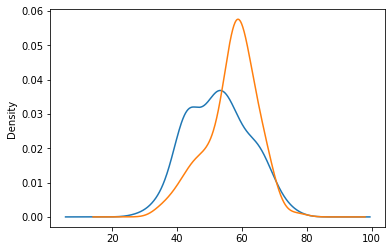

In [132]:
df_clev_normal['age'].plot.density()
df_clev_enfermo['age'].plot.density()

<AxesSubplot:ylabel='Density'>

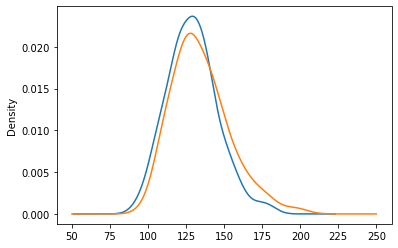

In [133]:

df_clev_normal['trestbps'].plot.density()
df_clev_enfermo['trestbps'].plot.density()

<AxesSubplot:ylabel='Density'>

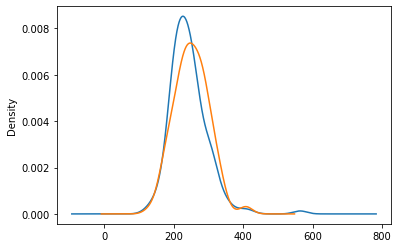

In [134]:
df_clev_normal['chol'].plot.density()
df_clev_enfermo['chol'].plot.density()

<AxesSubplot:ylabel='Density'>

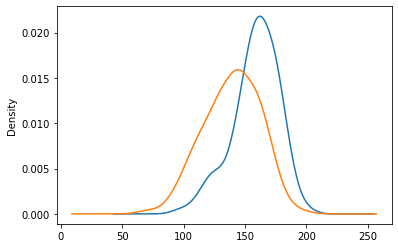

In [135]:
df_clev_normal['thalach'].plot.density()
df_clev_enfermo['thalach'].plot.density()

<AxesSubplot:ylabel='Density'>

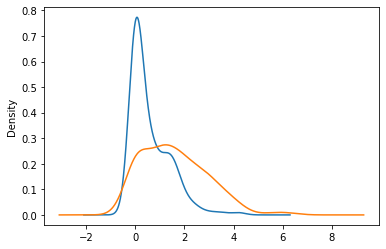

In [136]:
df_clev_normal['oldpeak'].plot.density()
df_clev_enfermo['oldpeak'].plot.density()

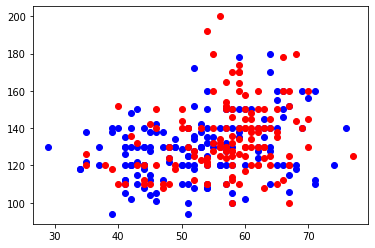

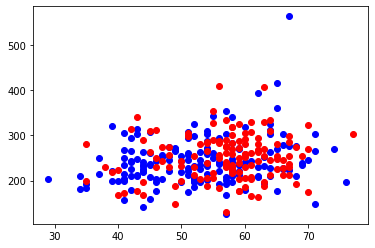

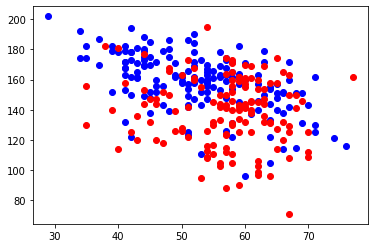

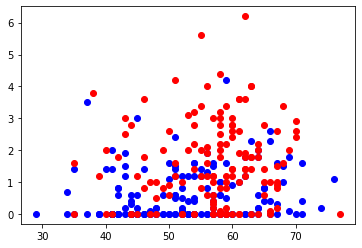

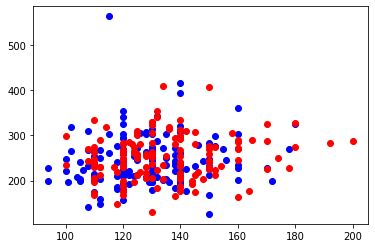

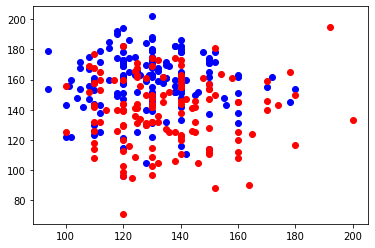

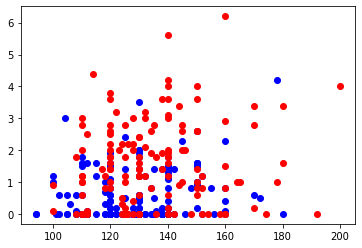

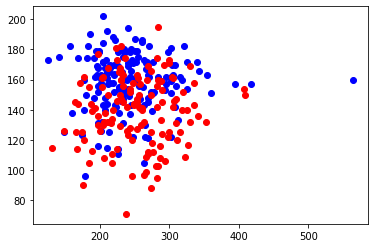

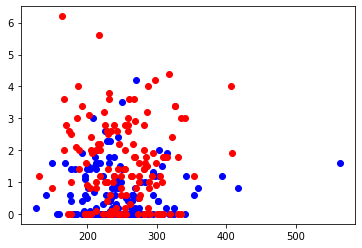

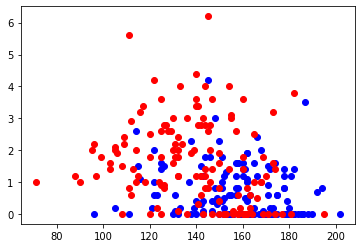

In [137]:
def plotWithColors(col1,col2):
    plt.scatter(x=df_clev_normal[col1],y=df_clev_normal[col2],color='blue')
    plt.scatter(x=df_clev_enfermo[col1],y=df_clev_enfermo[col2],color='red')
    plt.show()


lab = list(df_clev_numonly.columns.values)
for i in range(len(lab)):
    for j in range (i+1,len(lab)):
        plotWithColors(lab[i],lab[j])

Comprobamos que este no va a ser un problema fácil de resolver en un principio ya que no nos podemos agarrar a ningún patrón derivado de las distribuciones de las variables. Como muestran tanto la matriz de correlación como los diagramas de dispersión, no existe ninguna correlación fuerte (ni positiva ni negativa) entre dos variables distintas. Además, ninguna de estas correlaciones nos sirve para separar enfermos de sanos. Las distribuiciones de las variables, aunque más o menos regulares, ni coinciden ni son simétricas.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Teniendo en cuenta que para la construcción del árbol de decisión son más relevantes las variables categóricas, se puede afirmar que no es necesaria ni la estandarización ni el escalado de los datos

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [138]:
data_df = df_clev.drop(columns=['target']).values
data_target = df_clev['target'].values
print(data_df)
data_target

[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


['Normal', 'Enfermo', 'Enfermo', 'Normal', 'Normal', ..., 'Enfermo', 'Enfermo', 'Enfermo', 'Enfermo', 'Enfermo']
Length: 297
Categories (2, object): ['Enfermo', 'Normal']

In [139]:
## Buscamos el mayor éxito en el test con el 10-fold cross validation para hallar la profundidad óptima
maxVal = [0,0,0] ## Tupla en la que guardaremos el máximo del test_score, train_score y la profundidad
for depth in range(1,10):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=random_state)
    scores = cross_validate(dtc, data_df, data_target, scoring='accuracy', cv=10, return_train_score=True)

    if max(scores["test_score"]) > maxVal[0]:
        maxVal[0] = max(scores["test_score"])
        maxVal[1] = max(scores["train_score"])
        maxVal[2] = depth

maxVal

[0.9, 0.8656716417910447, 3]

depth=3 es la profundidad que nos da mejores resultados en el test y, por lo tanto, es la profundidad óptima

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

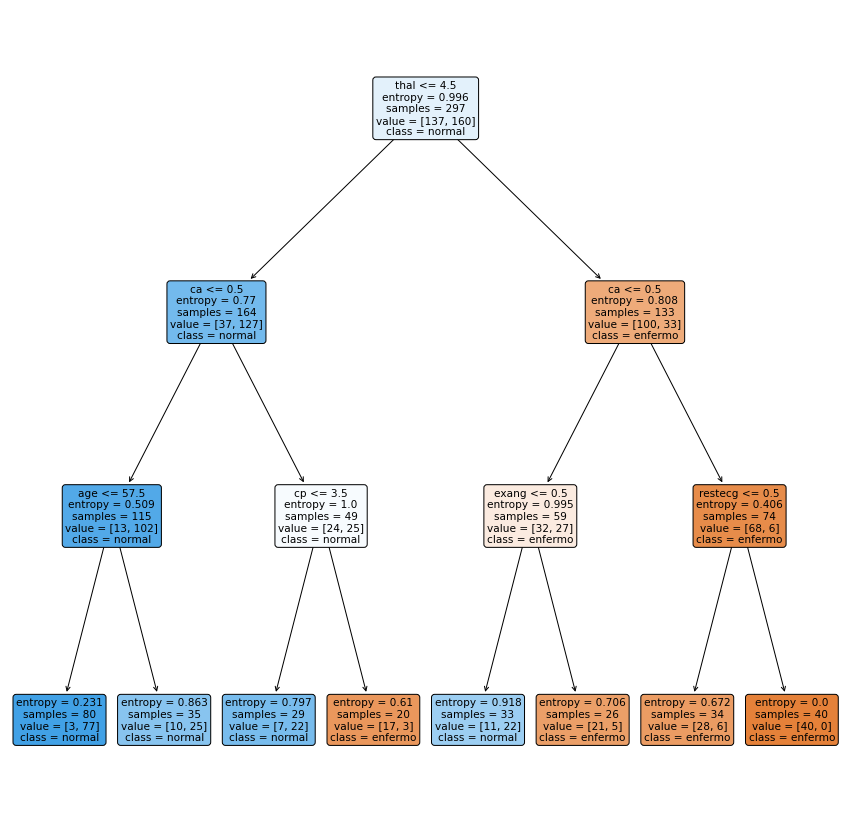

In [142]:
opti_depth = 3
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=opti_depth, random_state=random_state)
dtc.fit(data_df,data_target)
plt.figure(figsize=(15,15))
plot_tree(dtc, filled=True,feature_names=df_clev.columns.values, class_names=['enfermo','normal'], rounded=True)
plt.show()

Comprobamos que las variables más importantes son las que se encuentran más cerca de la raíz. Es decir: thal, ca, age, cp y exang. Se echan en falta muchas variables (desde el sexo hasta el colesterol). No, el árbol que hemos construido no es capaz de separar las clases (ca es una variable importante para recorrer el árbol pero no está garantizado que el paciente esté enfermo o no)

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.